### Q1 (i)

Given accuracy: 0.8

$\frac{TP + TN}{N} = 0.8$

$ TP = \gamma N $

$ TN = 0.8N - \gamma N $

$ FP = \gamma N - 0.3N $

$ FN = 0.5N - \gamma N $

$ Precision = \frac{\gamma }{2\gamma -0.3} $

$ Recall = 2\gamma $

Minimal Precision: 0.7143
Maximal Precision: 1.0000


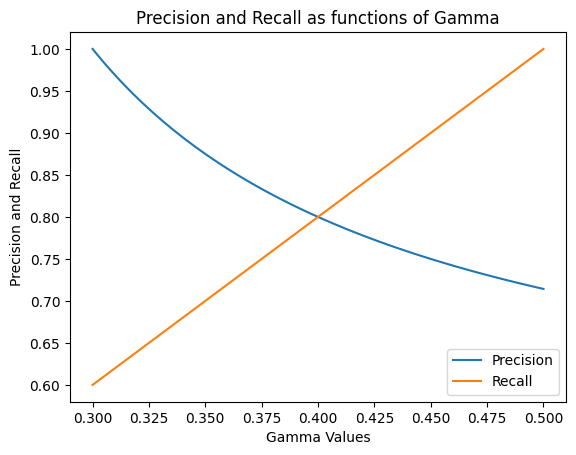

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def calculate_precision_recall(gamma, N):
    precision = gamma / (2*gamma -0.3)
    recall = 2*gamma
    return precision, recall


gamma_values = np.linspace(0.3, 0.5, 100)

N = 1000

precision_values, recall_values = zip(*[calculate_precision_recall(gamma, N) for gamma in gamma_values])

min_precision = np.min(precision_values)
max_precision = np.max(precision_values)

print(f'Minimal Precision: {min_precision:.4f}')
print(f'Maximal Precision: {max_precision:.4f}')

plt.plot(gamma_values, precision_values, label='Precision')
plt.plot(gamma_values, recall_values, label='Recall')
plt.xlabel('Gamma Values')
plt.ylabel('Precision and Recall')
plt.legend()
plt.title('Precision and Recall as functions of Gamma')
plt.show()

### Q1 (ii)

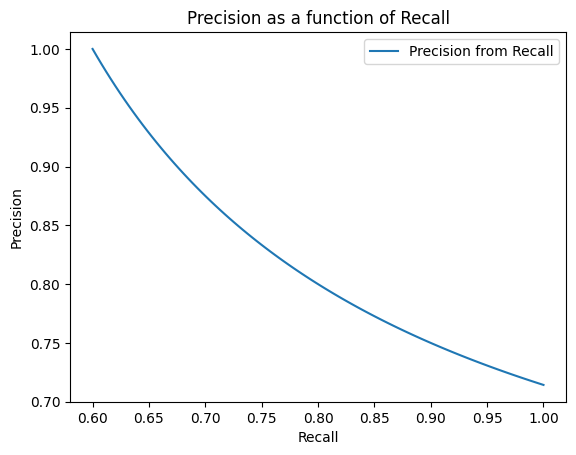

In [2]:
def precision_from_recall(recall):
    return 0.5 * recall / (recall - 0.3)

recall_values = np.linspace(np.min(recall_values), np.max(recall_values), 100)

precision_values_from_recall = [precision_from_recall(recall) for recall in recall_values]

plt.plot(recall_values, precision_values_from_recall, label='Precision from Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision as a function of Recall')
plt.show()

### Q2

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt 
path="/Users/zhangyuanzhuo/425 ML"
import os
os.chdir(path)
df = pd.read_csv("card_transdata-1.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [4]:
from imblearn.over_sampling import SMOTENC

X = df.drop('fraud', axis=1)
categorical_features_indices = [False, False, False, True, True,True,True]
y = df['fraud']

X_train = X.iloc[:500000,:]
y_train = y.iloc[:500000]
X_test = X.iloc[500000:,:]
y_test = y.iloc[500000:]

### Q2 (i), (ii)

In [5]:
def fit_decision_tree(X_train, y_train, X_test, y_test):

    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

    dt_classifier.fit(X_train, y_train)

    y_train_pred = dt_classifier.predict(X_train)

    y_test_pred = dt_classifier.predict(X_test)

    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    return train_precision, train_recall, train_f1, test_precision, test_recall, test_f1

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_f1_scores = []
test_f1_scores = []


for gamma in gamma_values:
    smote = SMOTENC(categorical_features = categorical_features_indices, sampling_strategy=gamma, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    
    train_precision, train_recall, train_f1, test_precision, test_recall, test_f1 = fit_decision_tree(X_resampled, y_resampled, X_test, y_test)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    print(f"Metrics for oversampled dataset with gamma={gamma}:")
    print(f"Training Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    print(f"Testing Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")
    print("\n")


Metrics for oversampled dataset with gamma=0.1:
Training Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Testing Precision: 1.0000, Recall: 0.9997, F1 Score: 0.9998


Metrics for oversampled dataset with gamma=0.2:
Training Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Testing Precision: 0.9997, Recall: 0.9997, F1 Score: 0.9997


Metrics for oversampled dataset with gamma=0.3:
Training Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Testing Precision: 0.9994, Recall: 0.9997, F1 Score: 0.9995


Metrics for oversampled dataset with gamma=0.4:
Training Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Testing Precision: 0.9994, Recall: 0.9998, F1 Score: 0.9996


Metrics for oversampled dataset with gamma=0.5:
Training Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Testing Precision: 0.9992, Recall: 0.9997, F1 Score: 0.9994


Metrics for oversampled dataset with gamma=0.6:
Training Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Testing Precision: 0.9993, Recall: 0

### Q2 (iii)

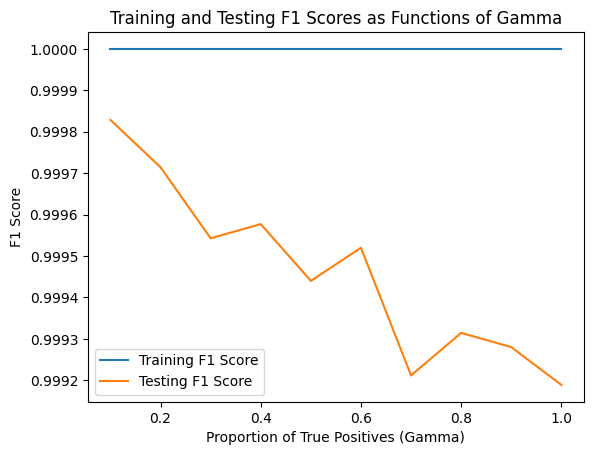

In [7]:
plt.plot(gamma_values, train_f1_scores, label='Training F1 Score')
plt.plot(gamma_values, test_f1_scores, label='Testing F1 Score')
plt.xlabel('Proportion of True Positives (Gamma)')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Training and Testing F1 Scores as Functions of Gamma')
plt.show()

From the plot, SMOTE-NC does not help because the test F1 score shows a decreasing trend.